# Credit Card Users Segmentation

## Description

### Objective

Making clustering model for Customer Segmentation of a credit card user from a bank.

### Problem Statement

1. How is the credit card users behavior in choosing a payment method ?
2. Which payment method  is used most often ?
3. Which payment method has the most cash flow ?
4. Which model is able to separate the credit card user well ?
5. How to improve the model clustering ?

## Working Area
### 1. Import Libraries

In [68]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Outliers handling
from feature_engine.outliers import Winsorizer

# Numerical scaling
from sklearn.preprocessing import RobustScaler

# Import Model
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

# Model evaluation
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px

# Ignore the warning notes
import warnings
warnings.filterwarnings("ignore")

### 2. Data Loading
Extracting dataset from ftds-hacktiv8-project, with dataset phase1_ftds_016_rmt and table name credit-card-information using following command to obtain the dataset.
<br>
SELECT *
<br>
FROM `ftds-hacktiv8-project.phase1_ftds_016_rmt.credit-card-information`
<br>
and save is as 'h8dsft_P1G4_rivaldo_jasper` with csv format.

In [69]:
# Import csv file as dataframe
df = pd.read_csv('h8dsft_P1G4_rivaldo_jasper.csv')

# Show dataframe head
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8


In [70]:
# Show dataframe tail
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


Description<br>
CUST_ID : Indetification of Credit Card holder<br>
BALANCE : Balance amounth left in their account to make purchases<br>
BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 ( 0 = not frequently updated, 1 = frequently updated )<br>
PURCHASES : Amount of purchases made from account<br>
ONEOFF_PURCHASES : Maximum purchase amount done in one-go<br>
INSTALLMENTS_PURCHASES : Amount of purchases done in installment<br>
CASH_ADVANCE : Cash in advance given by the user<br>
PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 ( 0 = not frequently purchased, 1 = frequently purchased )<br>
ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go ( 0 = not frequently purchased, 1 = frequently purchaed )<br>
PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done ( 0 = not frequently done, 1 = frequently done )<br>
CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid<br>
CASH_ADVANCE_TRX : Number of transactions made with 'Cash in Advanced'<br>
PURCHASES_TRX : Number of purchase transactions made<br>
CREDIT_LIMIT : Limit of Credit Card for user<br>
PAYMENTS : No description found<br>
MINIMUM_PAYMENTS : No description found<br>
PRC_FULL_PAYMENT : No description found<br>
TENURE : No description found

Statement :<br>
1. Since the dataset contains unique identifiers, checking for duplicate rows is require
2. Undescribed columns will be deleted since no further information is found

In [71]:
# Drop duplicate rows
df.drop_duplicates()

# Delete undescribed columns
df = df.drop(['PAYMENTS', 'MINIMUM_PAYMENTS' , 'PRC_FULL_PAYMENT' , 'TENURE'], axis=1)

### 3. Exploratory Data Analysis (EDA)

In [72]:
# Check missing values and columns type to ensure all columns are in correct format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Statement :<br>
1. Since only one row in column CREDIT_LIMIT that has a missing value, therefore the row will be terminated.
2. All columns are in suitable type as the descriptions.

In [73]:
# Drop null values
df = df[df['CREDIT_LIMIT'].notna()]

In [74]:
# Check dataset's statistical parameters
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT
count,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000
mean,4475.892713,1566.089791,0.877767,1003.382544,588.636388,415.117839,973.629487,0.490232,0.202659,0.365070,0.134149,3.196916,14.493742,4494.020175
std,2584.209966,2091.311473,0.235391,2211.009126,1666.663328,927.443733,2133.670549,0.399851,0.298520,0.397343,0.199242,6.500813,24.157766,3668.535689
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000
25%,2238.500000,132.796283,0.888889,40.365000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000
50%,4475.000000,875.322114,1.000000,362.830000,29.995000,89.515000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000
75%,6713.500000,2060.592320,1.000000,1123.030000,580.380000,484.362500,1099.005854,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000


Statement :<br>
1. Since oneoff purchase is greater than credit card limit, there is a possibility that many poeple like to do over credit.
2. Since all of frequency columns highest number is 1, all frequency columns that have a value greater than 1 will be considered as false input / wrong frequency calculation and will be terminated or be rescaled.

In [75]:
# Check number of rows that have CASH_ADVANCE_FREQUENCY over than 1
df[df['CASH_ADVANCE_FREQUENCY'] > 1]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT
4285,8920,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0
4286,2652,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0


Statement :<br>
Since the wrong input data is only 2 out of 4474 rows, therefore eliminating the rows will be performed.

In [76]:
# Making new dataframe with ASH_ADVANCE_FREQUENCY less or equal to 1
df = df[df['CASH_ADVANCE_FREQUENCY'] <= 1]

# Drop USER ID
df = df.drop(['CUST_ID'], axis = 1)

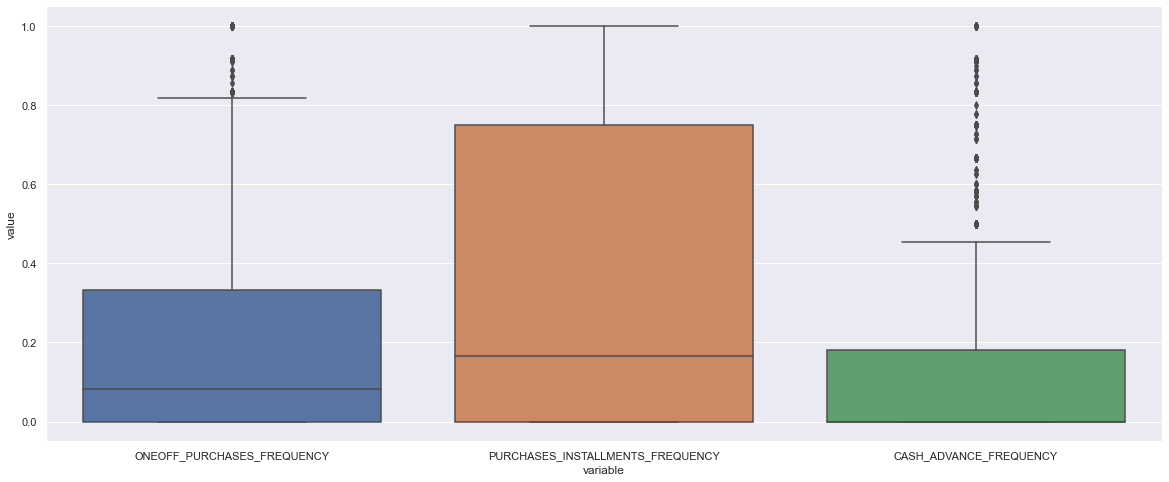

In [77]:
# Compare every payment method frequency
df_freq = df[['ONEOFF_PURCHASES_FREQUENCY' , 'PURCHASES_INSTALLMENTS_FREQUENCY' , 'CASH_ADVANCE_FREQUENCY']]
sns.set(rc={"figure.figsize":(20, 8)})
sns.boxplot(x="variable", y="value", data=pd.melt(df_freq))
plt.show()

<AxesSubplot:>

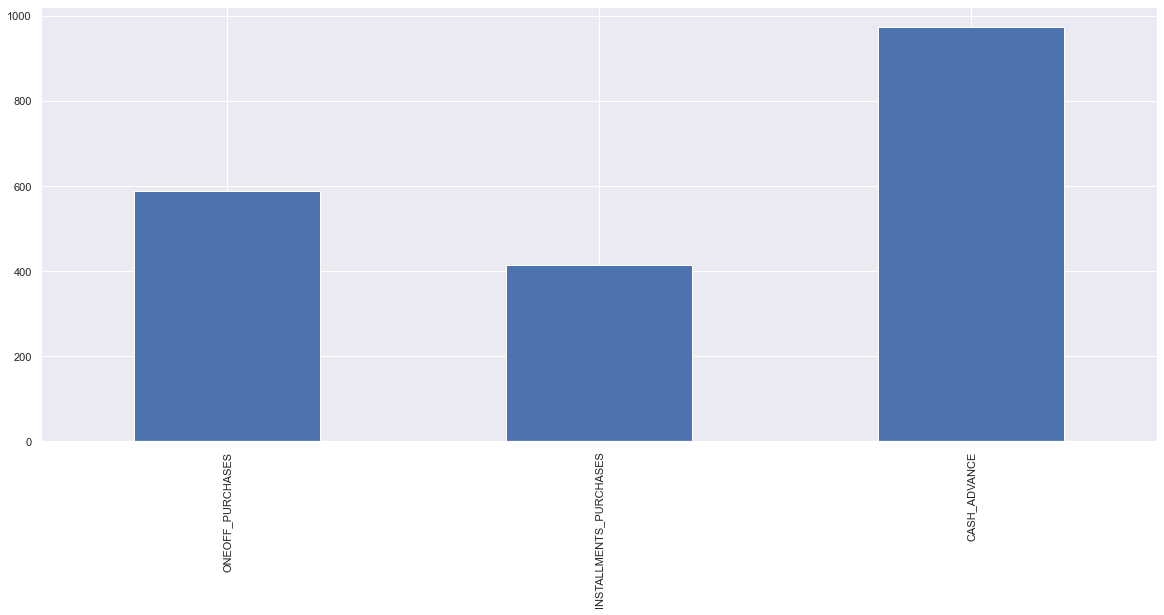

In [78]:
# Check the amount of purchase between every payment method
df_freq = df[['ONEOFF_PURCHASES' , 'INSTALLMENTS_PURCHASES' , 'CASH_ADVANCE']]
df_freq.mean().plot.bar()

Statement :<br>
Purchases installments is the most frequently used method, while cash advance is the least frequently used method.<br>
While in the other side, the average amount of money used for cash advance is the highest amount, and installments purchases is the lowest amount of money.<br>
Therefore, we can temporarily conclude the amount of money used in one payment method will be inverted to the frequency of use of that payment method.

In [79]:
# Check the number of overcredit customers
print(round(len(df[df['CREDIT_LIMIT'] < df['PURCHASES']]) / len(df) * 100,2), '% customers do over credit with oneoff purchases only')

4.7 % customers do over credit with oneoff purchases only


Statement :<br>
Since the number of customers who did over credit is relatively small ( under than 5% ), I assume that customers don't really like over credit.

In [80]:
# Check the balance left compared to limit
print(100 - round((df['BALANCE'] / df['CREDIT_LIMIT'] * 100).mean(),2), '%')

61.25 %


Statement :<br>
Most of the customer only uses around 61.25% of the credit limit.

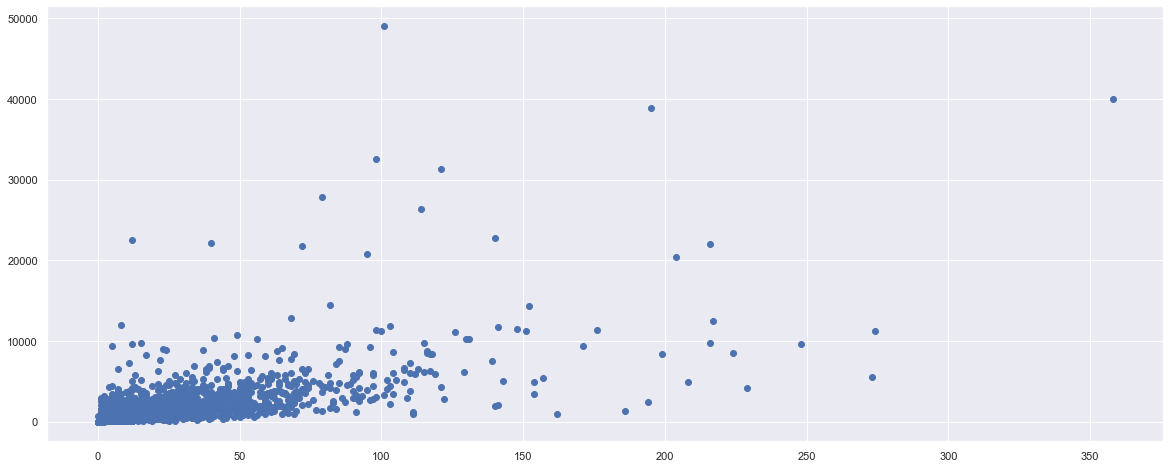

In [81]:
# Check customers behaviour in number of transactions
plt.scatter(x = df['PURCHASES_TRX'] , y = df['PURCHASES'])

Statement :<br>
There is no visible pattern that connects the number of transactions made with the amount of money issued.<br>
Since manually check the customers behavior by visual judgement is too hard to do, therefore customers clustering is required.

### 4. Data Preprocessing

In [82]:
# Split train test set with Inference Model
data_inf = df.sample(10, random_state = 1)

# Remove Inference Model from dataset
data_train = df.drop(data_inf.index)

# Reset index for both dataset
data_train.reset_index(drop = True , inplace = True)
data_inf.reset_index(drop = True , inplace = True)

In [83]:
# Make a list of unscaled variables
unscaled_list = ['BALANCE' , 'PURCHASES' , 'ONEOFF_PURCHASES' , 'INSTALLMENTS_PURCHASES' , 'CASH_ADVANCE' , 'CASH_ADVANCE_TRX' , 'PURCHASES_TRX' , 'CREDIT_LIMIT']

# Check the unscaled variables data distribution using skewness values 
data_train[unscaled_list].skew()

BALANCE                    2.456937
PURCHASES                  8.977369
ONEOFF_PURCHASES          10.129371
INSTALLMENTS_PURCHASES     8.107970
CASH_ADVANCE               4.737968
CASH_ADVANCE_TRX           4.759901
PURCHASES_TRX              4.477737
CREDIT_LIMIT               1.543169
dtype: float64

Statement :<br>
Since the skewness of every unscaled variable is over than 0.5, therefore all of them are considered as skewed data. Because of that, the InterQuartile Range method will be chosed to check the outliers.

In [84]:
# Defining a function to show outliers
def Show_Skew_LLUL(df, variable, multiplier = 1.5):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - multiplier * IQR
    UL = Q3 + multiplier * IQR  
    out_df = df[(df[variable] > UL) | (df[variable] < LL)]
    out_df.sort_values(variable, ascending = False, inplace = True)
    out_df.reset_index(inplace = True)
    print(out_df.shape[0] / df.shape[0] * 100, '% is considered as outliers')
    return out_df.iloc[np.r_[0:6, -6:-1]]

In [85]:
# Check outliers for every unscaled variable
Show_Skew_LLUL(data_train,'BALANCE',3) # Balance column

2.285970416853429 % is considered as outliers


,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT
0,559,19043.138560,1.0,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0
1,3689,16304.889250,1.0,1770.57,0.00,1770.57,7424.094447,0.500000,0.000000,0.416667,0.666667,13,9,19000.0
2,3254,16259.448570,1.0,5024.68,3582.45,1442.23,328.698275,1.000000,0.833333,1.000000,0.083333,2,143,18000.0
3,2786,15258.225900,1.0,529.30,529.30,0.00,4100.891579,0.500000,0.500000,0.000000,1.000000,23,10,19000.0
4,2707,15155.532860,1.0,717.24,717.24,0.00,4718.274895,1.000000,1.000000,0.000000,0.500000,7,24,18000.0
5,3443,14224.115410,1.0,0.00,0.00,0.00,4614.427403,0.000000,0.000000,0.000000,0.333333,9,0,19000.0
96,2497,7975.191430,1.0,1142.15,1017.65,124.50,2652.115823,0.500000,0.333333,0.250000,0.250000,3,10,9000.0
97,3603,7934.946009,1.0,1792.15,1792.15,0.00,4169.060991,0.333333,0.333333,0.000000,0.333333,6,16,11500.0
98,4430,7907.725211,1.0,1685.19,1552.31,132.88,8253.390661,0.833333,0.750000,0.166667,0.416667,14,27,18500.0
99,3514,7888.028118,1.0,0.00,0.00,0.00,1282.985376,0.000000,0.000000,0.000000,0.333333,7,0,12000.0


In [86]:
Show_Skew_LLUL(data_train,'PURCHASES',3) # Purchases column

4.056476916181085 % is considered as outliers


,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT
0,3186,11547.520010,1.0,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0
1,716,4010.621974,1.0,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0
2,541,3391.702180,1.0,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0
3,848,5131.319584,1.0,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0
4,802,3454.094319,1.0,31299.35,19064.30,12235.05,0.000000,1.000000,0.666667,0.833333,0.000000,0,121,7500.0
5,3223,3012.178613,1.0,27790.42,14605.99,13184.43,469.074937,1.000000,0.666667,1.000000,0.083333,1,79,12000.0
175,3574,6426.639738,1.0,4462.86,2816.46,1646.40,4599.625146,1.000000,0.833333,0.916667,0.333333,11,103,11800.0
176,3205,561.346036,1.0,4430.12,2992.49,1437.63,80.614627,1.000000,1.000000,0.750000,0.083333,1,68,4500.0
177,3322,6980.228444,1.0,4400.00,4000.00,400.00,913.382295,0.333333,0.083333,0.333333,0.083333,1,5,10000.0
178,1047,434.099616,1.0,4392.05,3817.98,574.07,0.000000,1.000000,1.000000,1.000000,0.000000,0,79,6000.0


In [87]:
Show_Skew_LLUL(data_train,'ONEOFF_PURCHASES',3) # Oneoff Purchases column

6.252801434334379 % is considered as outliers


,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT
0,3186,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0
1,541,3391.702180,1.000000,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0
2,848,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0
3,716,4010.621974,1.000000,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0
4,440,2643.343414,1.000000,26402.39,22257.39,4145.00,0.000000,1.000000,1.000000,0.333333,0.000000,0,114,16500.0
5,3700,6372.182817,1.000000,22101.78,22101.78,0.00,19513.474830,0.333333,0.333333,0.000000,0.666667,35,40,7500.0
273,2515,5311.500998,1.000000,2339.79,2339.79,0.00,5930.115233,1.000000,1.000000,0.000000,0.250000,8,12,6500.0
274,4061,202.996947,1.000000,2338.83,2338.83,0.00,1959.553078,0.916667,0.916667,0.000000,0.166667,2,42,7500.0
275,616,446.735142,1.000000,5228.36,2337.44,2890.92,0.000000,1.000000,1.000000,1.000000,0.000000,0,71,3000.0
276,286,264.103675,0.818182,3568.21,2336.41,1231.80,0.000000,0.750000,0.666667,0.583333,0.000000,0,60,1500.0


In [88]:
Show_Skew_LLUL(data_train,'INSTALLMENTS_PURCHASES',3) # Installments purchases column

4.123711340206185 % is considered as outliers


,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT
0,188,4060.710208,0.727273,22500.00,0.00,22500.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,12,23000.0
1,716,4010.621974,1.000000,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0
2,3223,3012.178613,1.000000,27790.42,14605.99,13184.43,469.074937,1.000000,0.666667,1.000000,0.083333,1,79,12000.0
3,559,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0
4,802,3454.094319,1.000000,31299.35,19064.30,12235.05,0.000000,1.000000,0.666667,0.833333,0.000000,0,121,7500.0
5,3963,11209.370760,1.000000,11147.33,1137.40,10009.93,2728.576925,1.000000,0.250000,1.000000,0.166667,8,126,11000.0
178,1157,399.156352,1.000000,2870.76,894.49,1976.27,0.000000,1.000000,0.583333,1.000000,0.000000,0,109,2500.0
179,2141,213.233979,0.909091,2140.96,165.79,1975.17,0.000000,0.833333,0.166667,0.583333,0.000000,0,30,2500.0
180,433,209.490297,1.000000,1956.60,0.00,1956.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0
181,481,5779.287938,1.000000,5233.92,3277.47,1956.45,0.000000,1.000000,0.750000,1.000000,0.000000,0,61,6000.0


In [89]:
Show_Skew_LLUL(data_train,'CASH_ADVANCE',3) # Cash advance column

5.490811295383236 % is considered as outliers


,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT
0,4375,8823.284205,1.000000,3719.00,2293.18,1425.82,29282.109150,1.000000,0.750000,1.000000,0.416667,26,61,15500.0
1,4213,4530.205197,1.000000,1750.66,643.18,1107.48,26268.699890,1.000000,0.333333,1.000000,0.583333,10,36,8500.0
2,3733,7081.171387,1.000000,0.00,0.00,0.00,26194.049540,0.000000,0.000000,0.000000,0.909091,69,0,9000.0
3,4169,10915.550750,1.000000,0.00,0.00,0.00,23130.821060,0.000000,0.000000,0.000000,0.583333,23,0,15000.0
4,3478,4529.895962,0.727273,0.00,0.00,0.00,21943.849420,0.000000,0.000000,0.000000,0.333333,12,0,13000.0
5,4252,14100.251100,1.000000,4995.80,3403.11,1592.69,20712.670080,1.000000,1.000000,0.333333,0.833333,36,34,16500.0
239,3698,6059.861762,1.000000,250.32,250.32,0.00,4447.636548,0.083333,0.083333,0.000000,0.666667,10,1,7000.0
240,2632,1497.145968,0.875000,0.00,0.00,0.00,4444.646515,0.000000,0.000000,0.000000,0.375000,8,0,2500.0
241,3608,6468.426706,1.000000,277.70,277.70,0.00,4440.766432,0.666667,0.666667,0.000000,0.333333,6,8,10000.0
242,2728,1276.491537,0.833333,65.80,65.80,0.00,4422.783845,0.166667,0.166667,0.000000,0.500000,6,2,2500.0


In [90]:
Show_Skew_LLUL(data_train,'CASH_ADVANCE_TRX',3) # Cash advance transcation column

3.989242492155984 % is considered as outliers


,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT
0,3732,4175.826879,1.000000,0.00,0.00,0.00,9968.184827,0.000000,0.000000,0.000000,0.909091,110,0,10500.0
1,2783,5481.738308,1.000000,0.00,0.00,0.00,8896.923090,0.000000,0.000000,0.000000,1.000000,80,0,9000.0
2,2787,1780.188356,1.000000,845.67,31.50,814.17,4137.170984,0.750000,0.166667,0.583333,1.000000,71,16,2500.0
3,3733,7081.171387,1.000000,0.00,0.00,0.00,26194.049540,0.000000,0.000000,0.000000,0.909091,69,0,9000.0
4,2704,3808.073463,0.909091,6030.34,2874.89,3155.45,7279.880364,1.000000,0.500000,1.000000,0.500000,62,104,7000.0
5,2781,7715.659048,1.000000,0.00,0.00,0.00,6182.982033,0.000000,0.000000,0.000000,1.000000,62,0,11500.0
172,4211,2182.752161,1.000000,3216.97,2360.30,856.67,5594.061996,1.000000,0.666667,1.000000,0.583333,17,51,10000.0
173,4208,5961.863054,1.000000,320.08,64.03,256.05,3134.417004,1.000000,0.083333,0.916667,0.583333,17,13,7000.0
174,4203,5983.285834,1.000000,4170.04,4020.04,150.00,2359.135053,0.750000,0.750000,0.416667,0.583333,17,23,7000.0
175,3693,4487.993384,1.000000,1654.94,464.50,1190.44,2132.805215,1.000000,0.416667,1.000000,0.666667,17,51,7500.0


In [91]:
Show_Skew_LLUL(data_train,'PURCHASES_TRX',3) # Purchases transcation column

3.7427162707306145 % is considered as outliers


,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT
0,716,4010.621974,1.000000,40040.71,24543.52,15497.19,0.0,1.0,1.000000,1.000000,0.0,0,358,18000.0
1,804,2901.999862,1.000000,11250.65,10165.88,1084.77,0.0,1.0,1.000000,0.750000,0.0,0,274,9500.0
2,1018,5292.905315,1.000000,5539.68,2603.79,2935.89,0.0,1.0,0.916667,1.000000,0.0,0,273,6000.0
3,718,975.416023,1.000000,9586.10,7916.74,1669.36,0.0,1.0,1.000000,1.000000,0.0,0,248,12000.0
4,953,681.615445,1.000000,4117.24,290.00,3827.24,0.0,1.0,0.166667,1.000000,0.0,0,229,6000.0
5,442,4450.957226,1.000000,8445.96,1987.85,6458.11,0.0,1.0,0.750000,1.000000,0.0,0,224,6500.0
161,465,1474.990634,0.818182,4469.59,2836.63,1632.96,0.0,1.0,0.666667,1.000000,0.0,0,67,4000.0
162,675,346.425872,1.000000,3463.12,1046.72,2416.40,0.0,1.0,0.500000,1.000000,0.0,0,66,5000.0
163,1113,807.091888,1.000000,1272.53,356.64,915.89,0.0,1.0,0.500000,1.000000,0.0,0,66,6000.0
164,542,4230.023512,1.000000,5755.93,3854.62,1901.31,0.0,1.0,0.833333,0.833333,0.0,0,66,10000.0


In [92]:
Show_Skew_LLUL(data_train,'CREDIT_LIMIT',3) # Credit limit column

0.17929179740026896 % is considered as outliers


,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT
0,4165,1409.256223,0.900000,4569.65,1748.94,2820.71,3883.517967,0.700000,0.600000,0.600000,0.400000,5,24,30000.0
1,396,177.592802,1.000000,1471.55,1471.55,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,25,25000.0
2,188,4060.710208,0.727273,22500.00,0.00,22500.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,12,23000.0
3,3186,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0
4,149,588.795215,0.636364,4116.00,0.00,4116.00,0.000000,0.500000,0.000000,0.500000,0.000000,0,12,21500.0
5,1624,10598.467770,1.000000,2084.48,1300.48,784.00,0.000000,0.666667,0.416667,0.583333,0.000000,0,13,21500.0
2,188,4060.710208,0.727273,22500.00,0.00,22500.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,12,23000.0
3,3186,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0
4,149,588.795215,0.636364,4116.00,0.00,4116.00,0.000000,0.500000,0.000000,0.500000,0.000000,0,12,21500.0
5,1624,10598.467770,1.000000,2084.48,1300.48,784.00,0.000000,0.666667,0.416667,0.583333,0.000000,0,13,21500.0


Statement :<br>
All outliers are actually gives reasonable numbers such as purchases for every method that never surpass the purchases amount, or credit limit that given with certain considerations outside of the dataset.<br>
But the amount of cash advance is way greater than the credit limit, and it is very uncommon to withdraw money by credit card to overlimit them. Therefore the only outliers that will be handled is CASH_ADVANCE column. Since the number of outliers is over than 5%, therefore capping method will be performed.

In [93]:
# Defining function for capping
winsoriser = Winsorizer(capping_method='iqr', tail = 'both', fold = 3)
uncapped = pd.DataFrame(data_train['CASH_ADVANCE'])

# Cap the CASH_ADVANCE column
capped = winsoriser.fit_transform(uncapped)

# Exchange the dataframe value with the capped one
data_train['CASH_ADVANCE'] = capped

In [94]:
# Recheck the data distribution of unscaled variables
data_train[unscaled_list].skew()

BALANCE                    2.456937
PURCHASES                  8.977369
ONEOFF_PURCHASES          10.129371
INSTALLMENTS_PURCHASES     8.107970
CASH_ADVANCE               1.713065
CASH_ADVANCE_TRX           4.759901
PURCHASES_TRX              4.477737
CREDIT_LIMIT               1.543169
dtype: float64

Statement :<br>
Since most of the data still contains natural outliers, therefore RobustScaler will be performed to scaling before dimention reduction is performed.

In [95]:
# Defining scaler function
scaler = RobustScaler()

# Make a new dataframe that contains unscaled variables only
dt_unscaled = data_train[unscaled_list]

# Make a new dataframe that contains scaled values
dt_scaled = pd.DataFrame(scaler.fit_transform(dt_unscaled), columns = unscaled_list)

# Combine the dataframe of scaled values with the old one
df_old = data_train.drop(unscaled_list, axis = 1)
df_new = pd.merge(df_old, dt_scaled, left_index=True, right_index=True)

In [96]:
# VIF dataframe
X = df_new
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

,VIF,variable
0,18.743743,BALANCE_FREQUENCY
1,26.272463,PURCHASES_FREQUENCY
2,5.855750,ONEOFF_PURCHASES_FREQUENCY
3,17.619383,PURCHASES_INSTALLMENTS_FREQUENCY
4,5.665403,CASH_ADVANCE_FREQUENCY
5,2.327097,BALANCE
6,1499.679712,PURCHASES
7,870.715676,ONEOFF_PURCHASES
8,274.896876,INSTALLMENTS_PURCHASES
9,3.496444,CASH_ADVANCE


Statement :<br>
Feature with VIF score more than 5 will be selected as feature for clustering. Since VIF score indicates multicollinearity, for alternative you can manually check using heatmap of log pearson correlation.

In [97]:
# Make a feature list for dimentional reduction using PCA
PCA_list = ['PURCHASES' , 'ONEOFF_PURCHASES' , 'INSTALLMENTS_PURCHASES' , 'PURCHASES_FREQUENCY' , 'BALANCE_FREQUENCY' , 'PURCHASES_INSTALLMENTS_FREQUENCY' , 'ONEOFF_PURCHASES_FREQUENCY' , 'CASH_ADVANCE_FREQUENCY']

### 5. Model Definition and Training
#### PCA Model

In [98]:
# Defining PCA model
PCA_Reducer = PCA(0.95, random_state = 1) # The minimum of remaining information is 95%

# Reduce the dimensions
df_PCA = df_new[PCA_list]
reduced_data = PCA_Reducer.fit_transform(df_PCA)

# Check the number of reduced dimensions data
PCA_Reducer.n_components_

2

In [99]:
# Make a new dataframe containing reduced data to clustering
reduced_df = pd.DataFrame(reduced_data, columns = ['V1' , 'V2'])

#### KMeans Model

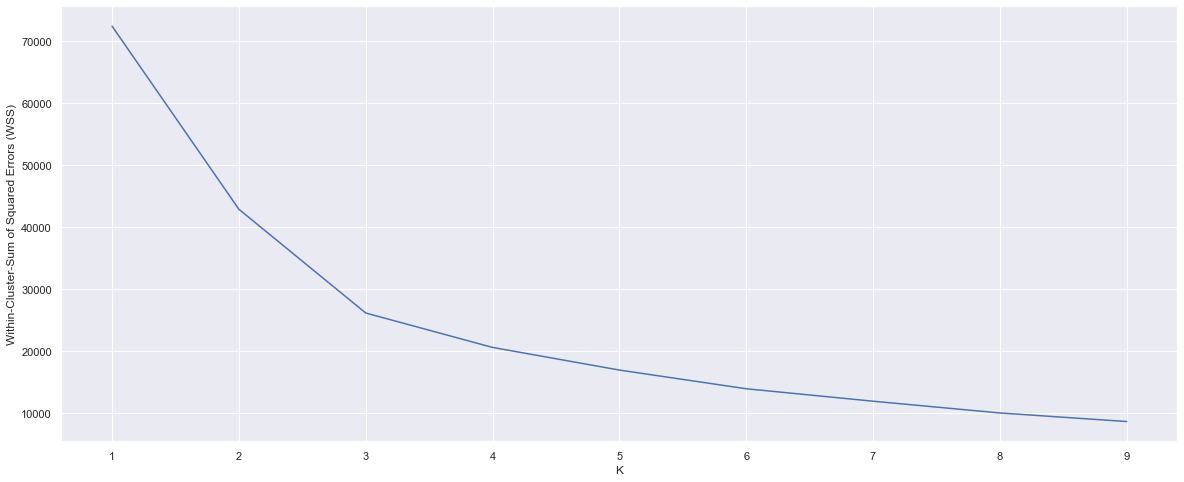

In [100]:
# choose K values for K Means

# Elbow method
K=range(1,10)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters = k, random_state = 1)
    kmeans = kmeans.fit(reduced_df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [101]:
# Silhouete score
for i in range(2,9):
    labels=cluster.KMeans(n_clusters = i,random_state = 1).fit(reduced_df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(reduced_df,labels,metric="euclidean",random_state = 1)))

Silhouette score for k(clusters) = 2 is 0.8932832799584967
Silhouette score for k(clusters) = 3 is 0.7464430603237506
Silhouette score for k(clusters) = 4 is 0.6382103507927933
Silhouette score for k(clusters) = 5 is 0.6486206614894084
Silhouette score for k(clusters) = 6 is 0.6203028647969057
Silhouette score for k(clusters) = 7 is 0.6187151049196892
Silhouette score for k(clusters) = 8 is 0.5895447133501348


Statement :<br>
With silhouette score, we can conclude that the effective value of K is 2. Since at 2 we can see a slightly bend in elbow method, therefore it is a valid statement that the effective value of K is 2.

#### Gaussian Mixture Model

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

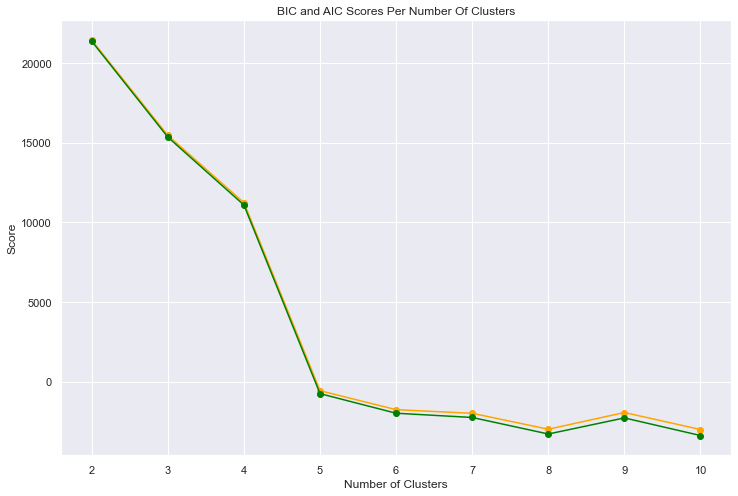

In [102]:
# Set up a range of cluster numbers to try
n_range = range(2,11)

# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=1, 
                         n_init=5)
    gm.fit(reduced_df)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(reduced_df))
    aic_score.append(gm.aic(reduced_df))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

Statement :<br>
I will pick 5 as the number of clusters since the chart levels off after that.

#### DBSCAN Model

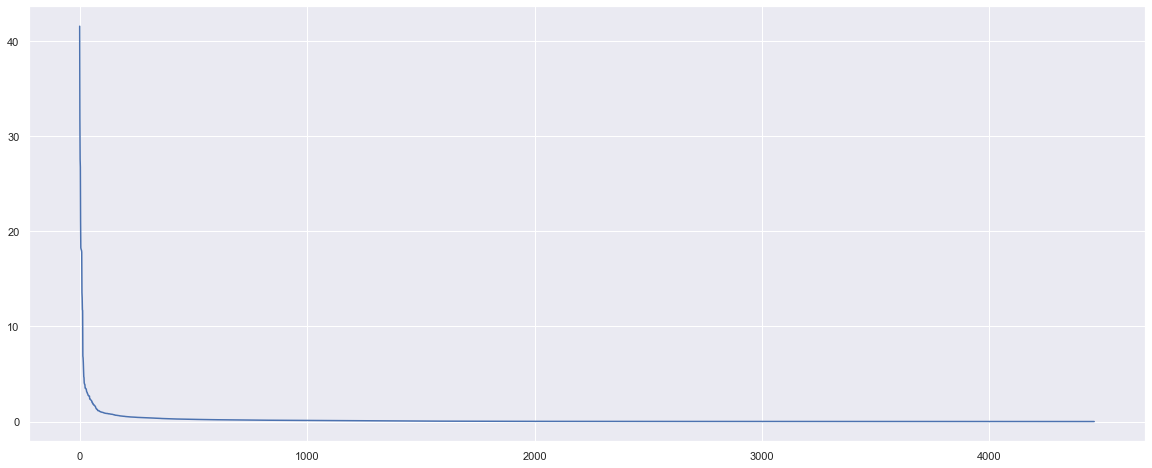

In [103]:
# predicting epsilon for DBSCAN
def isolate():
    X_train_final = reduced_df

    neigh = NearestNeighbors(n_neighbors=6)
    neigh.fit(X=X_train_final)

    distances, apakek = neigh.kneighbors(X=X_train_final)

    distances = np.sort(distances, axis=0)

    farthest_distances = distances[:,-1]
    farthest_distances[::-1].sort() # hack.

    sns.lineplot(x=range(0, len(farthest_distances)), y=farthest_distances)

    fig = px.line(y=farthest_distances)
    fig.show()

isolate()

Statement :<br>
The maximum curvature of the curve is about 20. Therefore, the number of epsilon will be 20.

In [104]:
# Silhouete score
for i in range(2,11):
    labels = DBSCAN(eps=i, min_samples=6).fit(reduced_df).labels_
    print ("Silhouette score for epsilon = "+str(i)+" is "
           +str(metrics.silhouette_score(reduced_df,labels,metric="euclidean",random_state = 1)))

Silhouette score for epsilon = 2 is 0.7907080946267556
Silhouette score for epsilon = 3 is 0.9303592503820013
Silhouette score for epsilon = 4 is 0.9345689446534796
Silhouette score for epsilon = 5 is 0.9425934032919611
Silhouette score for epsilon = 6 is 0.9425934032919611
Silhouette score for epsilon = 7 is 0.9425934032919611
Silhouette score for epsilon = 8 is 0.9425934032919611
Silhouette score for epsilon = 9 is 0.9425934032919611
Silhouette score for epsilon = 10 is 0.9425934032919611


Statement :<br>
Since the silhouette score for epsilon above 5 is stagnant, therefore we will pick the highest score of silhouette score with lowest epsilon number.

### 6. Model Training

In [105]:
# Clustering using KMeans
KM = KMeans(n_clusters = 2, init = 'k-means++' , random_state = 1)
y_KM = pd.DataFrame(KM.fit_predict(reduced_df))
y_KM = y_KM.rename(columns = {0:'KMeans Clusters'})

In [106]:
# Clustering using Gaussian Mixture Model
GM = GaussianMixture(n_components = 5, random_state = 1, n_init=10)
y_GM = pd.DataFrame(GM.fit_predict(reduced_df))
y_GM = y_GM.rename(columns = {0:'GaussianM Clusters'})

In [107]:
# Clustering using DBSCAN
DS = DBSCAN(eps = 5, min_samples=6)
y_DS = pd.DataFrame(DS.fit_predict(reduced_df))
y_DS = y_DS.rename(columns = {0:'DBSCAN Clusters'})

In [108]:
# Making a new dataframe containing all clustering
df_clusters = pd.concat([reduced_df, y_KM, y_GM, y_DS], axis = 1)
df_clusters

,V1,V2,KMeans Clusters,GaussianM Clusters,DBSCAN Clusters
0,-1.366942,-0.031523,0,0,0
1,-1.415919,-0.492301,0,1,0
2,-1.463917,-0.481723,0,1,0
3,-0.540498,-0.839046,0,1,0
4,1.028660,-1.463114,0,1,0
...,...,...,...,...,...
4457,-1.615358,-0.429806,0,4,0
4458,-1.616119,-0.430535,0,4,0
4459,-0.596518,-0.393909,0,3,0
4460,1.316858,-1.559773,0,1,0


### 7. Model Evaluation

In [109]:
# Recheck the number of information after dimension reduction
PCA_Reducer.explained_variance_ratio_

array([0.80186169, 0.17412393])

Statement :<br>
The remaining information is 0.8019 + 0.1741 ~ 97.6%. Since the dimension is reduced from 8 to 2 but the remaining information is 97.6%, we can say that the dimensity reduction was performed effectively.

<AxesSubplot:xlabel='V1', ylabel='V2'>

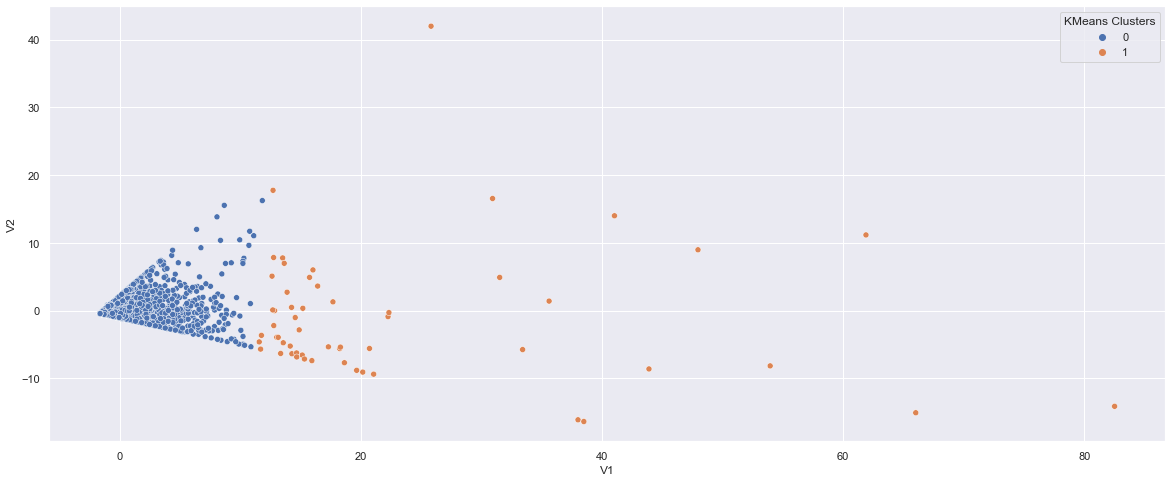

In [110]:
# Plot KMeans Clusters
sns.scatterplot(data = df_clusters, x = df_clusters['V1'], y = df_clusters['V2'], hue = 'KMeans Clusters')

<AxesSubplot:xlabel='V1', ylabel='V2'>

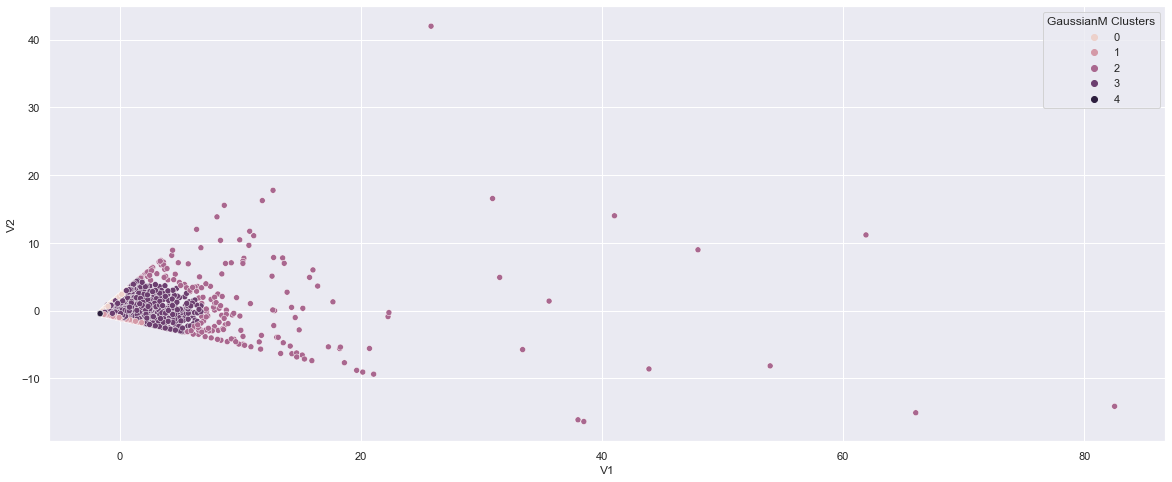

In [111]:
# Plot Gaussian Mixture Clusters
sns.scatterplot(data = df_clusters, x = df_clusters['V1'], y = df_clusters['V2'], hue = 'GaussianM Clusters')

<AxesSubplot:xlabel='V1', ylabel='V2'>

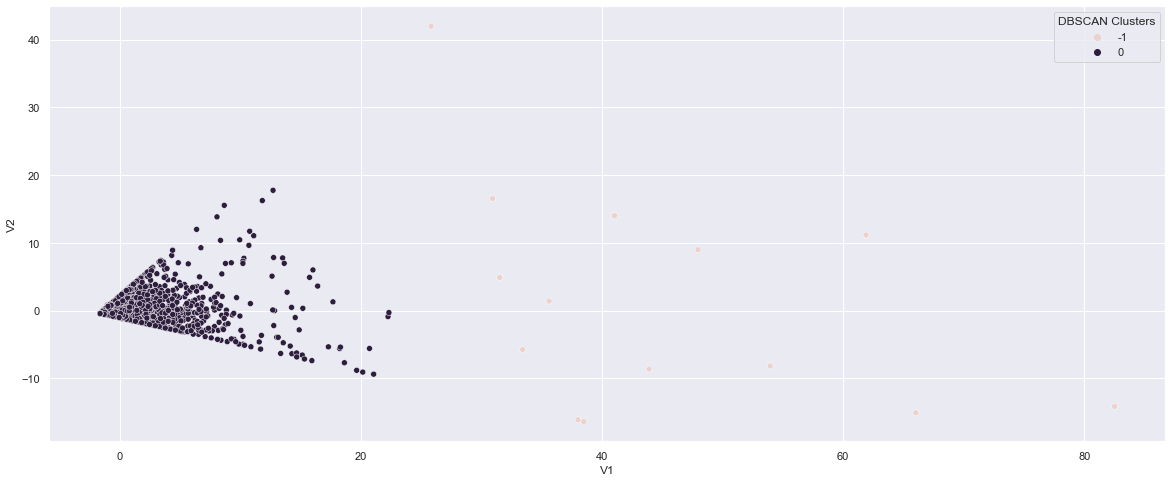

In [112]:
# Plot DBSCAN Clusters
sns.scatterplot(data = df_clusters, x = df_clusters['V1'], y = df_clusters['V2'], hue = 'DBSCAN Clusters')

Statement :<br>
Since I can barely see a cluster, KMeans and DBSCAN is showing a better results than Gaussian Mixture. Since by visual judgement, the only thing that can be separated is outliers and not.

### 8. Model Inference

In [113]:
# Split the data to scaling the unscaled variable
data_inf_unscaled_list = data_inf[unscaled_list]
data_inf_scaled = pd.DataFrame(scaler.transform(data_inf_unscaled_list), columns = unscaled_list)
df_inf_old = data_inf.drop(unscaled_list, axis = 1)
df_inf_new = pd.merge(df_inf_old, data_inf_scaled, left_index=True, right_index=True)

# Making a new dataframe that contains reduced data
df_inf_reduced = PCA_Reducer.transform(df_inf_new[PCA_list])
ID_DF = pd.DataFrame(df_inf_reduced, columns = ['V1','V2'])

# Predict the clustering for inference data using every model

# KMeans
y_KM = pd.DataFrame(KM.predict(ID_DF))
y_KM = y.rename(columns = {0:'KMeans Clusters'})

# Gaussian Mixture
y_GM = pd.DataFrame(GM.predict(ID_DF))
y_GM = y_GM.rename(columns = {0:'GaussianM Clusters'})

clusters = pd.concat([y_KM, y_GM], axis = 1)

id_clusters = pd.merge(data_inf, clusters, left_index=True, right_index=True)

In [114]:
# Showing the clustering results
id_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,Clusters,GaussianM Clusters
0,270.135147,0.909091,958.93,752.90,206.03,0.000000,0.750000,0.166667,0.666667,0.000000,0,26,1900.0,0,3
1,176.162762,0.909091,1814.64,1614.64,200.00,0.000000,0.583333,0.583333,0.083333,0.000000,0,25,4000.0,0,3
2,701.345445,1.000000,70.98,0.00,70.98,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,1000.0,0,0
3,765.109593,1.000000,0.00,0.00,0.00,457.076354,0.000000,0.000000,0.000000,0.250000,3,0,1200.0,0,4
4,2331.380170,1.000000,1919.66,1310.90,608.76,0.000000,0.916667,0.416667,0.750000,0.000000,0,34,6000.0,0,3
5,43.427180,1.000000,569.34,0.00,569.34,0.000000,1.000000,0.000000,1.000000,0.000000,0,19,16500.0,0,0
6,531.075085,0.818182,485.73,152.40,333.33,474.100770,0.250000,0.083333,0.166667,0.083333,1,3,2500.0,0,3
7,1452.469721,1.000000,205.89,205.89,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,1600.0,0,1
8,486.170360,0.545455,0.00,0.00,0.00,1494.441569,0.000000,0.000000,0.000000,0.083333,1,0,1500.0,0,4
9,2569.379868,1.000000,972.65,162.95,809.70,1390.367155,0.583333,0.166667,0.500000,0.166667,5,15,5500.0,0,3


Description
Since DBSCAN doesn't have labels for certain conditions but counting distance between data for clustering, thus predict inference data using DBSCAN is unable to do but labeling the original data ( that contains inference data ). But it won't make a big difference with clustering the train data.

## Conclusions, Assumptions, Overall Analysis
1. Payment method has an inverse between cash flow and frequency, the most frequenly used method is purchases installment yet it is also has the lowest cash flow. In the other side, cash advance is the least frequenly used method yet has the highest amount of cash flow.
2. KMeans and DBSCAN is able to separate the credit card user well since the only thing that observable are outliers and not.
3. The EDA after clustering wasn't performed because of the pattern of clustering is unable to be seen.
4. Using different models, parameters, or add features that have high multicollinearity will improve the model clustering and make the clusters that form more visible.